<a href="https://colab.research.google.com/github/Risha46/DEEPLEARNING/blob/main/DEEPLEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Core Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# OpenCV for Image Processing
import cv2

# Miscellaneous
import h5py
from PIL import Image


In [ ]:
data = pd.read_csv("/content/titanic.csv")

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

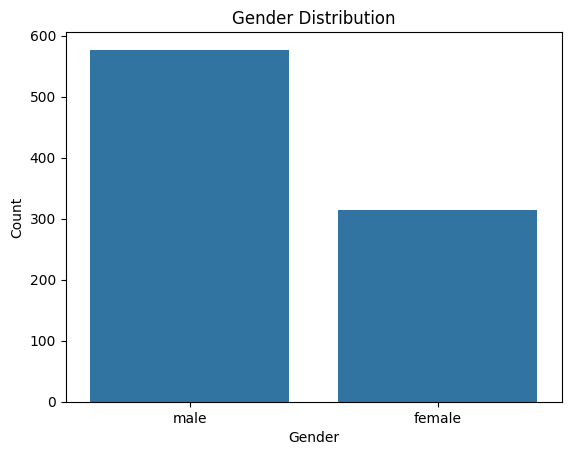

In [ ]:
sns.countplot(data=data, x='Sex')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


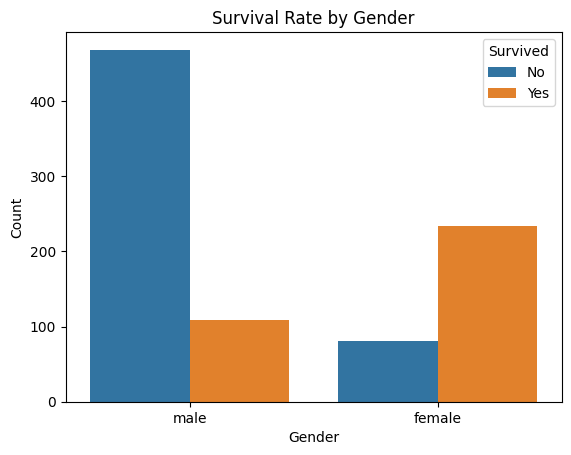

In [ ]:
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select the column to encode
embarked = data[['Embarked']].dropna()

# Create OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False)  # drop='first' avoids the dummy variable trap
one_hot_encoded = encoder.fit_transform(embarked)

# Convert to DataFrame
embarked_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['Embarked']))

# Fit and transform
embarked_encoded = encoder.fit_transform(embarked)

# Convert to DataFrame
embarked_df = pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(['Embarked']))

# Concatenate with the original dataset
data_encoded = pd.concat([data.drop(columns=['Embarked']), embarked_df], axis=1)

# Display the updated dataset
print(data_encoded.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN         0.0         0.0         1.0  
1      0          PC 17599  71.2833   C85         1.0         0.0         0.0  
2      0  STON/O2. 3101282   7.9250   NaN         0.0         0.0         1.0  


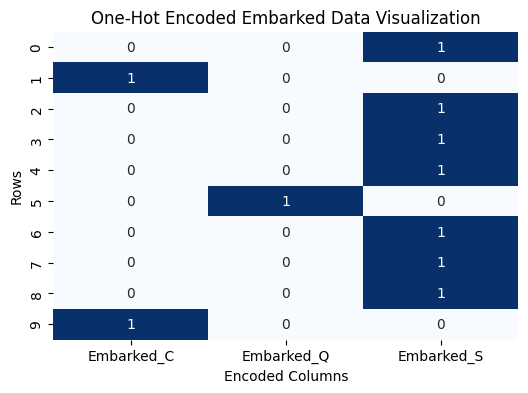

In [ ]:

# Visualize the one-hot encoded data
plt.figure(figsize=(6, 4))
sns.heatmap(embarked_df.head(10), annot=True, cmap="Blues", cbar=False)
plt.title("One-Hot Encoded Embarked Data Visualization")
plt.xlabel("Encoded Columns")
plt.ylabel("Rows")
plt.show()



In [ ]:
import numpy as np  # Fixed the typo in numpy import

import tensorflow as tf  # Fixed capitalization in import
from tensorflow import keras  # Fixed the typo in import

# (x) and X are unclear; removed as they don't serve any purpose in this context

from tensorflow.keras.datasets import imdb  # Fixed the typo 'indb' to 'imdb'

from tensorflow.keras.preprocessing.sequence import pad_sequences  # Fixed the typo in 'import'

from tensorflow.keras.models import Sequential  # Fixed the typo 'from'

from tensorflow.keras.layers import Embedding, LSTM, Dense  # Fixed 'fron' to 'from'

import matplotlib.pyplot as plt  # No errors here


Training data shape: (25000,), Labels shape: (25000,)
Testing data shape: (25000,), Labels shape: (25000,)
First review (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 

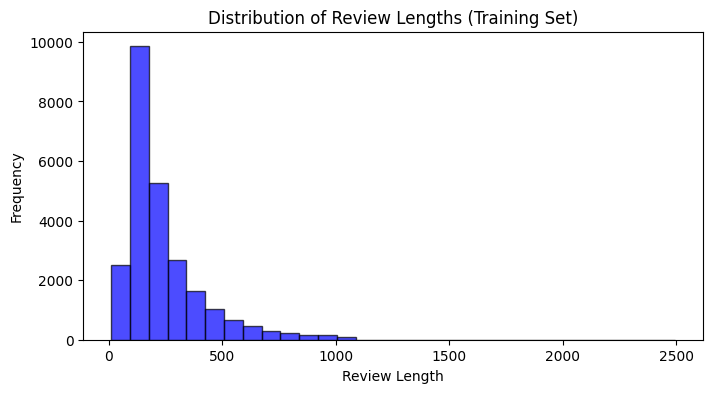

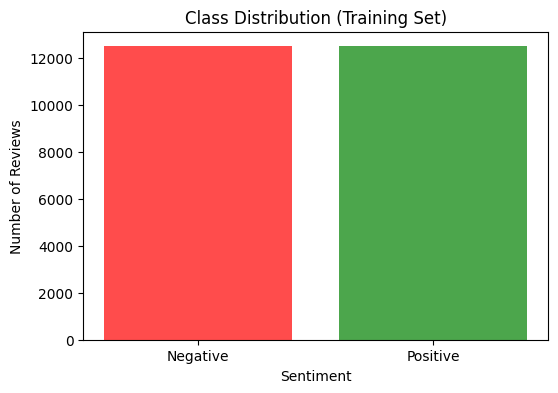

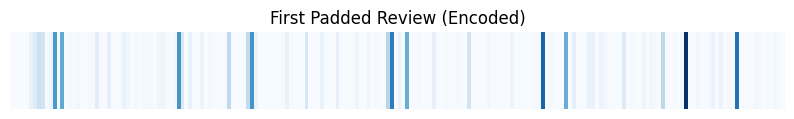

In [ ]:
# Load IMDb dataset
vocab_size = 10000  # Number of unique words to keep in the vocabulary
max_length = 200    # Maximum length of each review
padding_type = 'post'  # Padding type ('post' adds padding after the sequence)

# Load data and keep only the top `vocab_size` words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Explore the dataset
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}, Labels shape: {y_test.shape}")
print(f"First review (encoded): {x_train[0]}")
print(f"First review label: {y_train[0]}")

# Decode a review to understand the data
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in x_train[0]])
print(f"Decoded first review: {decoded_review}")

# Preprocess: Pad sequences to ensure uniform length
x_train_padded = pad_sequences(x_train, maxlen=max_length, padding=padding_type, truncating='post')
x_test_padded = pad_sequences(x_test, maxlen=max_length, padding=padding_type, truncating='post')

print(f"Padded training data shape: {x_train_padded.shape}")
print(f"Padded testing data shape: {x_test_padded.shape}")

# Visualization 1: Distribution of review lengths
review_lengths = [len(review) for review in x_train]
plt.figure(figsize=(8, 4))
plt.hist(review_lengths, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Review Lengths (Training Set)")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

# Visualization 2: Class distribution
plt.figure(figsize=(6, 4))
plt.bar(["Negative", "Positive"], [sum(y_train == 0), sum(y_train == 1)], color=["red", "green"], alpha=0.7)
plt.title("Class Distribution (Training Set)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

# Visualization 3: First padded review as a heatmap
plt.figure(figsize=(10, 1))
sns.heatmap([x_train_padded[0]], cmap="Blues", cbar=False, xticklabels=False, yticklabels=False)
plt.title("First Padded Review (Encoded)")
plt.show()

In [ ]:
# Load IMDb dataset with the top 10,000 most frequent words
vocab_size = 10000  # Top 10,000 words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Display dataset details
# print(f"Training data shape: {x_train.shape}")
# print(f"Testing data shape: {x_test.shape}")
# print(f"Example encoded review (first training sample): {x_train[0]}")
# print(f"Label for the first review: {y_train[0]}")

# Preprocess: Pad sequences to ensure uniform length
max_length = 200
x_train_padded = pad_sequences(x_train, maxlen=max_length)
x_test_padded = pad_sequences(x_test, maxlen=max_length)


build the model

In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=200),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 345s 868ms/step - accuracy: 0.6796 - loss: 0.5913 - val_accuracy: 0.7712 - val_loss: 0.4917
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 381s 868ms/step - accuracy: 0.8385 - loss: 0.3805 - val_accuracy: 0.8460 - val_loss: 0.3702
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 385s 875ms/step - accuracy: 0.8784 - loss: 0.3020 - val_accuracy: 0.8420 - val_loss: 0.3705
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 337s 864ms/step - accuracy: 0.9039 - loss: 0.2470 - val_accuracy: 0.8566 - val_loss: 0.3443
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 386s 875ms/step - accuracy: 0.9256 - loss: 0.2028 - val_accuracy: 0.8604 - val_loss: 0.3737


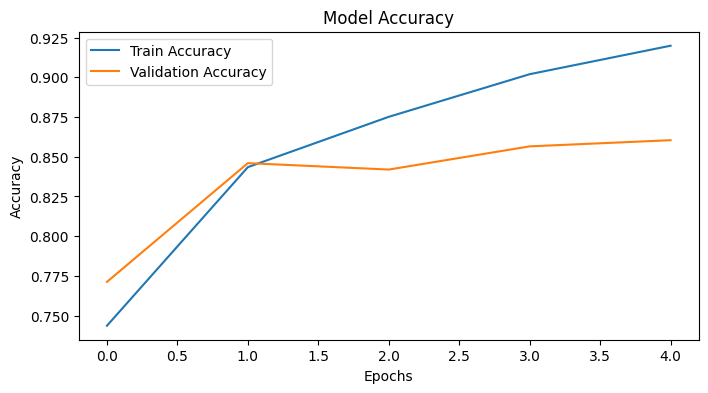

In [ ]:
# Train the model
history = model.fit(
    x_train_padded, y_train,
    validation_data=(x_test_padded, y_test),
    epochs=5,
    batch_size=64,
    verbose=1
)

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np  # For numerical operations and data manipulation
import pandas as pd  # For handling and processing datasets
import tensorflow as tf  # TensorFlow library for deep learning
from tensorflow import keras  # Keras API for building and training models

# Import tools from scikit-learn for data preprocessing and splitting
from sklearn.model_selection import train_test_split  # To split dataset into train and test sets
from sklearn.preprocessing import StandardScaler  # To normalize/scale numerical data

# Import Matplotlib for data visualization
import matplotlib.pyplot as plt  # To create plots and visualize data


In [ ]:
from sklearn.datasets import fetch_california_housing  # Import dataset from scikit-learn
import pandas as pd  # For handling and processing datasets

# Load the California housing dataset
california = fetch_california_housing()

# Create a DataFrame from the dataset
data = pd.DataFrame(california.data, columns=california.feature_names)

# Add the target variable ('MedHouseVal') to the DataFrame
data['MedHouseVal'] = california.target

# Display the first few rows of the DataFrame
print(data.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
X = data.drop(columns=['MedHouseVal'])  # Exclude the target column from features
y = data['MedHouseVal']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()  # Create a scaler instance

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)

In [ ]:
print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training set shape: X_train = (16512, 8), y_train = (16512,)
Test set shape: X_test = (4128, 8), y_test = (4128,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.6829 - mae: 2.4782
Test Loss (Mean Squared Error): 7.74305534362793
Test MAE (Mean Absolute Error): 2.4684267044067383
129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


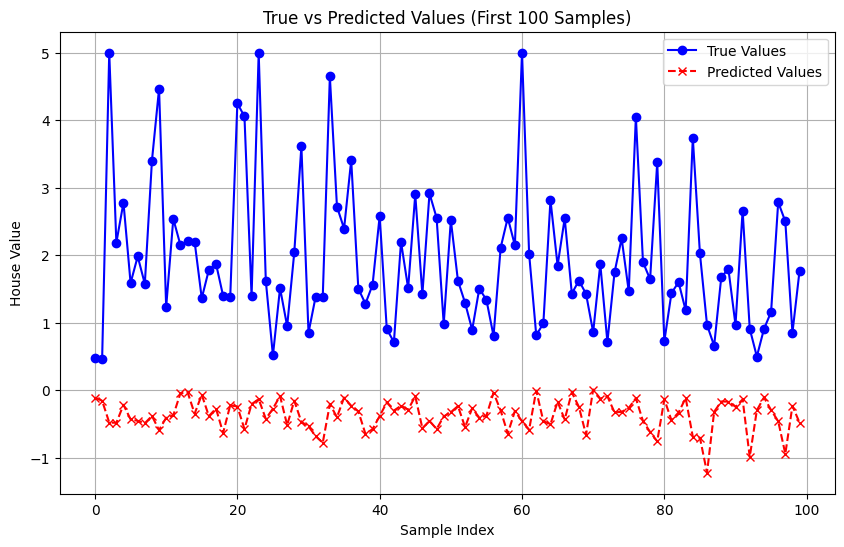

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

# Print the evaluation results
print(f"Test Loss (Mean Squared Error): {test_loss}")
print(f"Test MAE (Mean Absolute Error): {test_mae}")

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Visualize the true values vs predicted values for a subset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='True Values', color='blue', linestyle='-', marker='o')  # True values
plt.plot(y_pred[:100], label='Predicted Values', color='red', linestyle='--', marker='x')  # Predicted values
plt.title('True vs Predicted Values (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('House Value')
plt.legend()
plt.grid()
plt.show()


In [4]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import numpy as np



In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images into 1D vectors
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons
    Dropout(0.2),  # Dropout to reduce overfitting
    Dense(10, activation='softmax')  # Output layer for 10 classes with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8537 - loss: 0.4977 - val_accuracy: 0.9558 - val_loss: 0.1512
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9544 - loss: 0.1519 - val_accuracy: 0.9682 - val_loss: 0.1045
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9666 - loss: 0.1102 - val_accuracy: 0.9726 - val_loss: 0.0864
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9720 - loss: 0.0901 - val_accuracy: 0.9759 - val_loss: 0.0812
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9756 - loss: 0.0780 - val_accuracy: 0.9767 - val_loss: 0.0750
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9788 - loss: 0.0665 - val_accuracy: 0.9756 - val_loss: 0.0775
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9805 - loss: 0.0586 - val_accuracy: 0.9781 - val_loss: 0.0725
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9820 - loss: 0.053

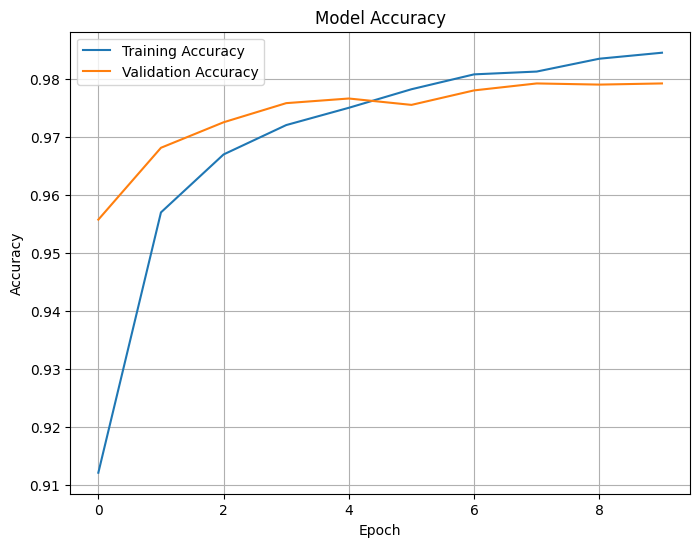

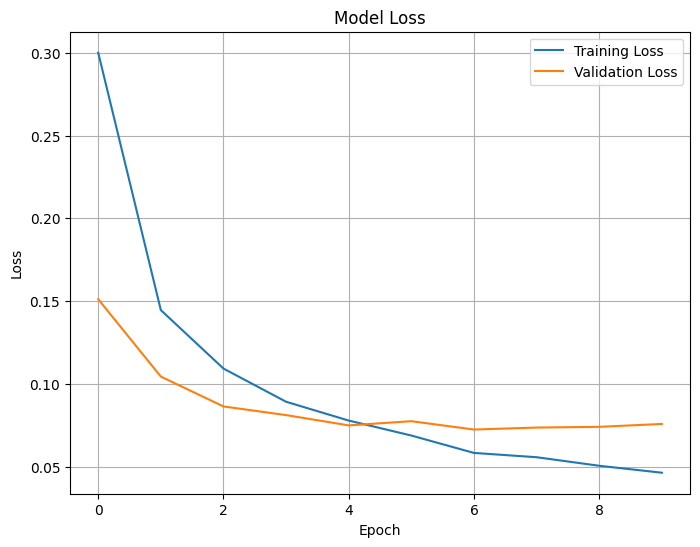

In [6]:
# Train the model
history = model.fit(
    X_train, y_train,  # Training data
    validation_data=(X_test, y_test),  # Validation data
    epochs=10,  # Number of training epochs
    batch_size=32,  # Size of training batches
    verbose=1  # Display progress during training
)

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
